<a href="https://colab.research.google.com/github/chewzzz1014/fyp/blob/master/ner/src/annotation_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load JSON data from the file
json_file = '/content/drive/MyDrive/FYP/Implementation/Resume Dataset/1142_resumes_annotated.json'

with open(json_file, 'r') as f:
    data = json.load(f)

print("JSON structure: ", type(data))
print(f"Number of tasks: {len(data)}")

JSON structure:  <class 'list'>
Number of tasks: 1142


In [11]:
first_item = data[0]

# Function to print the structure as a hierarchy tree without values, showing only the first element of any lists
def print_structure(data, level=0):
    indent = "  " * level  # Indentation for hierarchy levels
    if isinstance(data, dict):  # If the item is a dictionary
        for key, value in data.items():
            print(f"{indent}{key}:")  # Print key
            print_structure(value, level + 1)  # Recursively print the structure of the value
    elif isinstance(data, list):  # If the item is a list
        if data:  # Check if the list is not empty
            print(f"{indent}[0]")  # Print only the first element of the list
            print_structure(data[0], level + 1)  # Recursively print the structure of the first element

# Print the hierarchical structure of the first item without values
print("Structure of the first item:")
print_structure(first_item)

Structure of the first item:
id:
annotations:
  [0]
    id:
    completed_by:
    result:
      [0]
        value:
          start:
          end:
          text:
          labels:
            [0]
        id:
        from_name:
        to_name:
        type:
        origin:
    was_cancelled:
    ground_truth:
    created_at:
    updated_at:
    draft_created_at:
    lead_time:
    prediction:
    result_count:
    unique_id:
    import_id:
    last_action:
    task:
    project:
    updated_by:
    parent_prediction:
    parent_annotation:
    last_created_by:
file_upload:
drafts:
predictions:
data:
  Text:
meta:
created_at:
updated_at:
inner_id:
total_annotations:
cancelled_annotations:
total_predictions:
comment_count:
unresolved_comment_count:
last_comment_updated_at:
project:
updated_by:
comment_authors:


In [17]:
# Extract annotations from the JSON structure (assuming data is a list of tasks)
annotations = [task['annotations'] for task in data]  # Extract annotations from each task

# Flatten the list of annotations
entity_info = []

# Iterate through each annotation to extract entity labels and corresponding texts
for task_annotations in annotations:
    for annotation in task_annotations:
        for result in annotation['result']:
            label = result['value']['labels'][0]  # Assuming only one label per entity
            text = result['value']['text']
            entity_info.append({'label': label, 'text': text})

# Convert the entity information into a DataFrame
df = pd.DataFrame(entity_info)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122670 entries, 0 to 122669
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   122670 non-null  object
 1   text    122670 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


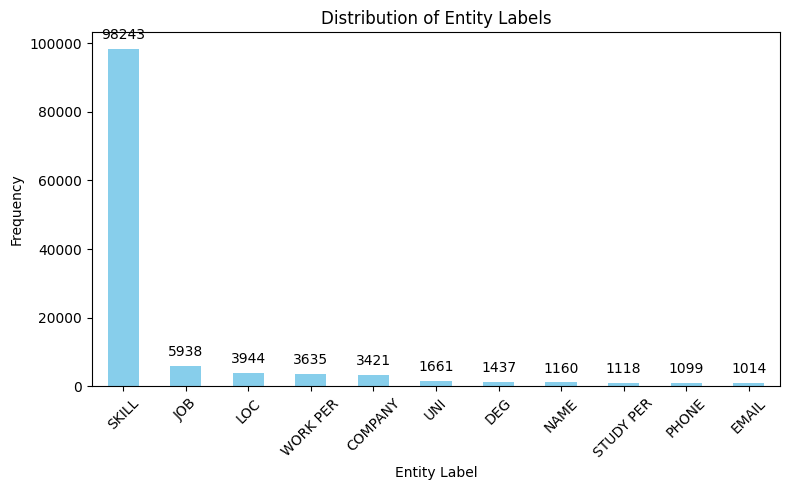

In [16]:
# EDA on the structure of the labels (tags)
label_distribution = df['label'].value_counts()

# Plot the distribution of entity labels
plt.figure(figsize=(8, 5))  # Adjust the figure size to be smaller
ax = label_distribution.plot(kind='bar', color='skyblue')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Entity Labels')
plt.xlabel('Entity Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

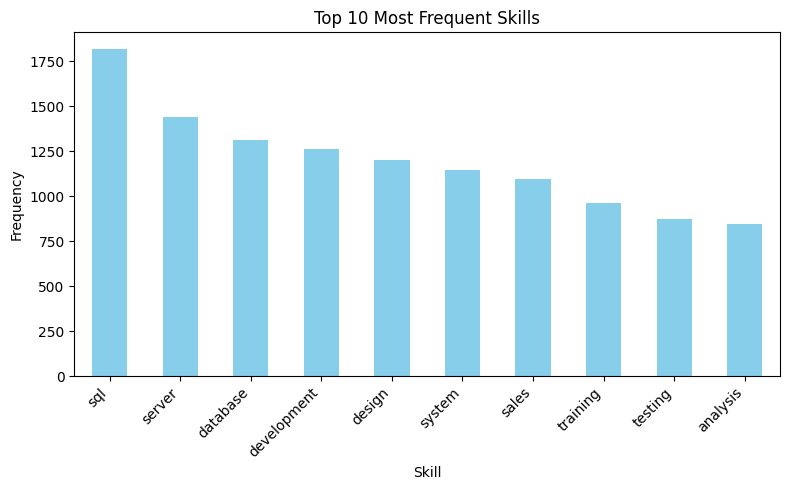

In [21]:
skills = []
for item in data:
    for annotation in item['annotations']:
        for result in annotation['result']:
            if 'SKILL' in result['value']['labels']:
                skills.append(result['value']['text'])

# Convert to a Pandas Series to count occurrences
skills_series = pd.Series(skills)

# Get the top 10 most common skills
top_skills = skills_series.value_counts().head(10)

# Plot the top 10 skills
plt.figure(figsize=(8, 5))
top_skills.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Skills')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()